In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model_no_comp = {
    "conv1": {
        "kernel": 3,
        "in": 3, 
        "out": 32,
        "dims": 224
    },  
    "conv2": {
        "kernel": 3,
        "in": 32, 
        "out": 16,
        "dims": 112
    },
    "conv31": {
        "kernel": 1,
        "in": 16, 
        "out": 16,
        "dims": 56
    },
    "conv32": {
        "kernel": 3,
        "in": 16, 
        "out": 32,
        "dims": 56
    },
    "conv33": {
        "kernel": 1,
        "in": 32, 
        "out": 32,
        "dims": 56
    },
    "conv34": {
        "kernel": 3,
        "in": 32, 
        "out": 64,
        "dims": 56
    },
    "conv41": {
        "kernel": 1,
        "in": 64, 
        "out": 32,
        "dims": 28
    },
    "conv42": {
        "kernel": 3,
        "in": 32, 
        "out": 64,
        "dims": 28
    },
    "conv43": {
        "kernel": 1,
        "in": 64, 
        "out": 32,
        "dims": 28
    },
    "conv44": {
        "kernel": 3,
        "in": 32, 
        "out": 64,
        "dims": 28
    },
    "conv45": {
        "kernel": 1,
        "in": 64, 
        "out": 32,
        "dims": 28
    },
    "conv46": {
        "kernel": 3,
        "in": 32, 
        "out": 64,
        "dims": 28
    },
    "linear1": { 
         "in": 64,
         "out": 16
    },
    "linear2": { 
         "in": 16,
         "out": 2
    },
}

In [3]:
def compute_macs_and_weights(model):
    for k in model.keys():
        if "conv" in k:
            model[k].update({"mac": (model[k]["kernel"]**2) * model[k]["in"] * model[k]["out"] * (model[k]["dims"]**2)})
            model[k].update({"weights": (model[k]["kernel"]**2) * model[k]["in"] * model[k]["out"]})
        elif "linear" in k:
            model[k].update({"mac": model[k]["in"] * model[k]["out"]})
            model[k].update({"weights": model[k]["in"] * model[k]["out"]})
        else:
            print("Wrong layer definition")

    model_macs = {k: model[k]["mac"]  for k in model.keys()}
    model_weights = {k: model[k]["weights"]  for k in model.keys()}

    return {
        "layers": model,
        "macs": model_macs,
        "weights": model_weights
    }

In [4]:
params_model_no_comp = compute_macs_and_weights(model_no_comp)

In [5]:
params_model_no_comp["layers"]

{'conv1': {'kernel': 3,
  'in': 3,
  'out': 32,
  'dims': 224,
  'mac': 43352064,
  'weights': 864},
 'conv2': {'kernel': 3,
  'in': 32,
  'out': 16,
  'dims': 112,
  'mac': 57802752,
  'weights': 4608},
 'conv31': {'kernel': 1,
  'in': 16,
  'out': 16,
  'dims': 56,
  'mac': 802816,
  'weights': 256},
 'conv32': {'kernel': 3,
  'in': 16,
  'out': 32,
  'dims': 56,
  'mac': 14450688,
  'weights': 4608},
 'conv33': {'kernel': 1,
  'in': 32,
  'out': 32,
  'dims': 56,
  'mac': 3211264,
  'weights': 1024},
 'conv34': {'kernel': 3,
  'in': 32,
  'out': 64,
  'dims': 56,
  'mac': 57802752,
  'weights': 18432},
 'conv41': {'kernel': 1,
  'in': 64,
  'out': 32,
  'dims': 28,
  'mac': 1605632,
  'weights': 2048},
 'conv42': {'kernel': 3,
  'in': 32,
  'out': 64,
  'dims': 28,
  'mac': 14450688,
  'weights': 18432},
 'conv43': {'kernel': 1,
  'in': 64,
  'out': 32,
  'dims': 28,
  'mac': 1605632,
  'weights': 2048},
 'conv44': {'kernel': 3,
  'in': 32,
  'out': 64,
  'dims': 28,
  'mac': 144506

In [6]:
params_model_no_comp["macs"]

{'conv1': 43352064,
 'conv2': 57802752,
 'conv31': 802816,
 'conv32': 14450688,
 'conv33': 3211264,
 'conv34': 57802752,
 'conv41': 1605632,
 'conv42': 14450688,
 'conv43': 1605632,
 'conv44': 14450688,
 'conv45': 1605632,
 'conv46': 14450688,
 'linear1': 1024,
 'linear2': 32}

Total MACs: 225592352
Total Weights: 92288


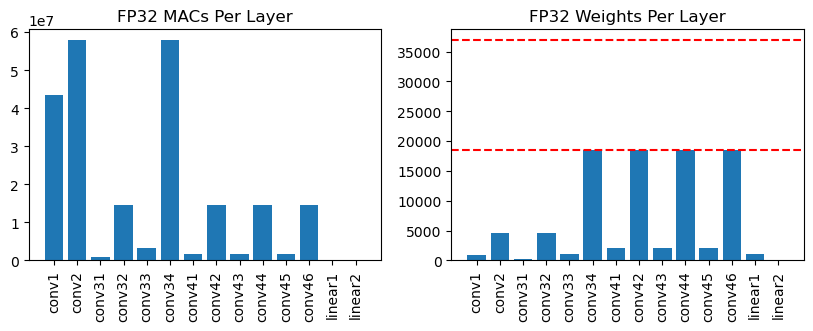

In [7]:
print(f'Total MACs: {np.array(list(params_model_no_comp["macs"].values())).sum()}')
print(f'Total Weights: {np.array(list(params_model_no_comp["weights"].values())).sum()}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

plt.subplot(1, 2, 1)
ax1.bar(list(params_model_no_comp["layers"].keys()), list(params_model_no_comp["macs"].values()))
ax1.set_xticks(list(params_model_no_comp["layers"].keys()))
ax1.set_xticklabels(list(params_model_no_comp["layers"].keys()), rotation=90)
ax1.set_title("FP32 MACs Per Layer")

plt.subplot(1, 2, 2)
plt.axhline(y=18432, color='r', linestyle='--')
plt.axhline(y=36864, color='r', linestyle='--')
ax2.bar(list(params_model_no_comp["layers"].keys()), list(params_model_no_comp["weights"].values()))
ax2.set_xticks(list(params_model_no_comp["layers"].keys()))
ax2.set_xticklabels(list(params_model_no_comp["layers"].keys()), rotation=90)
ax2.set_title("FP32 Weights Per Layer")

plt.show()

In [11]:
model_balanced = {
    "conv1": {
        "kernel": 3,
        "in": 3, 
        "out": 8,
        "dims": 224
    },  
    "conv2": {
        "kernel": 3,
        "in": 8, 
        "out": 16,
        "dims": 112
    },
    "conv31": {
        "kernel": 1,
        "in": 16, 
        "out": 16,
        "dims": 56
    },
    "conv32": {
        "kernel": 3,
        "in": 16, 
        "out": 32,
        "dims": 56
    },
    "conv33": {
        "kernel": 1,
        "in": 32, 
        "out": 32,
        "dims": 28
    },
    "conv34": {
        "kernel": 3,
        "in": 32, 
        "out": 64,
        "dims": 28
    },
    "conv41": {
        "kernel": 1,
        "in": 64, 
        "out": 32,
        "dims": 14
    },
    "conv42": {
        "kernel": 3,
        "in": 32, 
        "out": 64,
        "dims": 14
    },
    "conv43": {
        "kernel": 1,
        "in": 64, 
        "out": 32,
        "dims": 14
    },
    "conv44": {
        "kernel": 3,
        "in": 32, 
        "out": 64,
        "dims": 14
    },
    "conv45": {
        "kernel": 1,
        "in": 64, 
        "out": 32,
        "dims": 14
    },
    "conv46": {
        "kernel": 3,
        "in": 32, 
        "out": 64,
        "dims": 14
    },
    "linear1": { 
         "in": 64,
         "out": 16
    },
    "linear2": { 
         "in": 16,
         "out": 2
    },
}

In [12]:
params_model_balanced = compute_macs_and_weights(model_balanced)

Total MACs: 67839008
Total Weights: 88184


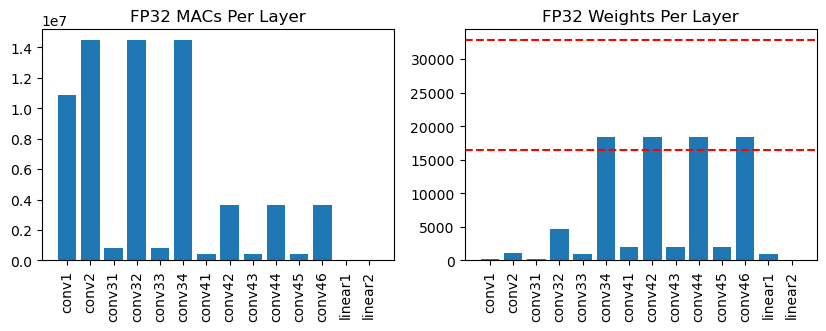

In [14]:
print(f'Total MACs: {np.array(list(params_model_balanced["macs"].values())).sum()}')
print(f'Total Weights: {np.array(list(params_model_balanced["weights"].values())).sum()}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

plt.subplot(1, 2, 1)
ax1.bar(list(params_model_balanced["layers"].keys()), list(params_model_balanced["macs"].values()))
ax1.set_xticks(list(params_model_balanced["layers"].keys()))
ax1.set_xticklabels(list(params_model_balanced["layers"].keys()), rotation=90)
ax1.set_title("FP32 MACs Per Layer")

plt.subplot(1, 2, 2)
plt.axhline(y=16384, color='r', linestyle='--')
plt.axhline(y=32768, color='r', linestyle='--')
ax2.bar(list(params_model_balanced["layers"].keys()), list(params_model_balanced["weights"].values()))
ax2.set_xticks(list(params_model_balanced["layers"].keys()))
ax2.set_xticklabels(list(params_model_balanced["layers"].keys()), rotation=90)
ax2.set_title("FP32 Weights Per Layer")

plt.show()